In [1]:
import pandas as pd

In [2]:
HORIZON = 10

In [4]:
data = pd.read_csv("..\EURUSD Reward Modelling.csv")

data['Target'] = 0
data['Class']  = 0
data['Action'] = 0
data['Reward'] = 0
data['Trade Signal'] = 0

In [5]:
data['Target'] = data['True Close'].shift(-HORIZON) - data['True Close']
data.dropna(inplace=True)

In [6]:
data.loc[data['Target'] > 0,'Class'] = 1

In [7]:
data.loc[data['True MA C'] > data['True MA O'],'Action'] = 1
data.loc[data['True MA C'] < data['True MA O'],'Action'] = -1

In [8]:
data['Reward'] = data['Target'] * data['Action']

In [9]:
data.loc[((data['Target'] < 0) & (data['Action'] == -1)),'Trade Signal'] = 1
data.loc[((data['Target'] > 0) & (data['Action'] == 1)),'Trade Signal'] = 1

In [10]:
data

Time  True Close  True MA C  True MA O     Open     High  \
0     2015.08.14 00:00:00     1.11100   1.113943   1.111743  0.01780  0.01928   
1     2015.08.16 00:00:00     1.11048   1.112260   1.114077  0.01612  0.01324   
2     2015.08.17 00:00:00     1.10757   1.109683   1.112397  0.02158  0.01875   
3     2015.08.18 00:00:00     1.10257   1.106873   1.109830  0.01742  0.01502   
4     2015.08.19 00:00:00     1.11152   1.107220   1.106887  0.00998  0.01562   
...                   ...         ...        ...        ...      ...      ...   
2984  2025.03.13 00:00:00     1.08549   1.088480   1.087953  0.04814  0.04762   
2985  2025.03.14 00:00:00     1.08816   1.087397   1.088477  0.04428  0.04091   
2986  2025.03.16 00:00:00     1.08796   1.087203   1.087157  0.03889  0.02483   
2987  2025.03.17 00:00:00     1.09181   1.089310   1.086963  0.02565  0.01329   
2988  2025.03.18 00:00:00     1.09386   1.091210   1.089070  0.01239  0.01012   

          Low    Close  MA Close 2  MA Open 2   Target  Class  Action  \
0     0.01566  0.01571    0.016907   0.015833  0.02272      1       1   
1     0.02243  0.02156    0.018353   0.017447  0.01370      1      -1   
2     0.02107  0.01738    0.018217   0.018500  0.01046      1      -1   
3     0.01438  0.00996    0.016300   0.018373  0.01717      1      -1   
4     0.01626  0.01512    0.014153   0.016327  0.01024      1       1   
...       ...      ...         ...        ...      ...    ...     ...   
2984  0.04247  0.04429    0.049113   0.045097 -0.00660      0       1   
2985  0.04419  0.03960    0.044967   0.048150 -0.01406      0      -1   
2986  0.04035  0.02565    0.036513   0.043770 -0.00789      0       1   
2987  0.02665  0.01238    0.025877   0.036273 -0.00877      0       1   
2988  0.01269  0.01512    0.017717   0.025643 -0.01150      0       1   

       Reward  Trade Signal  
0     0.02272             1  
1    -0.01370             0  
2    -0.01046             0  
3    -0.01717             0  
4     0.01024             1  
...       ...           ...  
2984 -0.00660             0  
2985  0.01406             1  
2986 -0.00789             0  
2987 -0.00877             0  
2988 -0.01150             0  

[2989 rows x 15 columns]

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

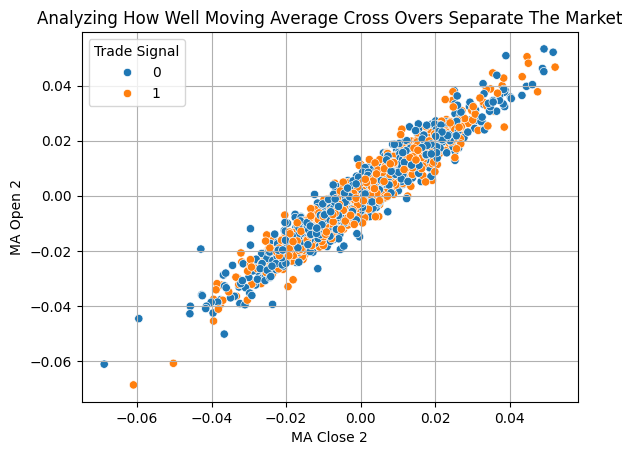

In [124]:
sns.scatterplot(data=data,x='MA Close 2',y='MA Open 2',hue='Trade Signal')
plt.title('Analyzing How Well Moving Average Cross Overs Separate The Market')
plt.grid()

In [61]:
fig = px.scatter_3d(data_frame=data,x='MA Open 2',y='MA Close 2',z='True Close',color='Trade Signal',size_max=1)

fig.update_traces(marker_size=2.5)

fig.show()

In [62]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

In [63]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [126]:
model = RidgeClassifier()

In [127]:
scores = []

In [128]:
scores.append(np.mean(np.abs(cross_val_score(model,data.iloc[:,4:-5],data.loc[:,'Class'],cv=tscv,scoring='accuracy'))))

In [129]:
scores.append(np.mean(np.abs(cross_val_score(model,data.iloc[:,4:-5],data.loc[:,'Trade Signal'],cv=tscv,scoring='accuracy'))))

Text(0.5, 0, '0: Market Return Forecast | 1: Strategy Profit/Loss Forecast')

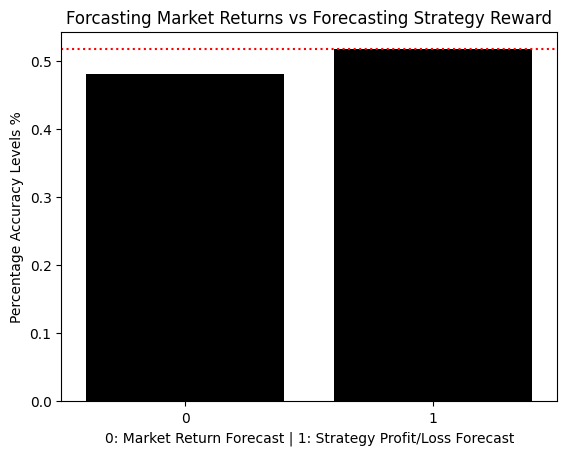

In [130]:
sns.barplot(scores,color='black')
plt.axhline(np.max(scores),linestyle=':',color='red')
plt.title('Forcasting Market Returns vs Forecasting Strategy Reward')
plt.ylabel('Percentage Accuracy Levels %')
plt.xlabel('0: Market Return Forecast | 1: Strategy Profit/Loss Forecast')

In [123]:
scores = (((scores / scores[0]) - 1) * 100)

scores[1]

7.595993322203687

In [ ]:
#Drop all the data that overlaps with your backtest period
data = data.iloc[:-((365 * 4) + (30 * 5) + 17),:]
data

Time  True Close  True MA C  True MA O     Open     High  \
0     2015.08.14 00:00:00     1.11100   1.113943   1.111743  0.01780  0.01928   
1     2015.08.16 00:00:00     1.11048   1.112260   1.114077  0.01612  0.01324   
2     2015.08.17 00:00:00     1.10757   1.109683   1.112397  0.02158  0.01875   
3     2015.08.18 00:00:00     1.10257   1.106873   1.109830  0.01742  0.01502   
4     2015.08.19 00:00:00     1.11152   1.107220   1.106887  0.00998  0.01562   
...                   ...         ...        ...        ...      ...      ...   
1357  2019.12.24 00:00:00     1.10860   1.108610   1.108417 -0.00407 -0.01051   
1358  2019.12.25 00:00:00     1.10946   1.109083   1.108690 -0.00948 -0.00907   
1359  2019.12.26 00:00:00     1.11014   1.109400   1.109167 -0.00335 -0.00218   
1360  2019.12.27 00:00:00     1.11765   1.112417   1.109480 -0.00230  0.00302   
1361  2019.12.29 00:00:00     1.11814   1.115310   1.112337  0.00382  0.00093   

          Low    Close  MA Close 2  MA Open 2   Target  Class  Action  \
0     0.01566  0.01571    0.016907   0.015833  0.02272      1       1   
1     0.02243  0.02156    0.018353   0.017447  0.01370      1      -1   
2     0.02107  0.01738    0.018217   0.018500  0.01046      1      -1   
3     0.01438  0.00996    0.016300   0.018373  0.01717      1      -1   
4     0.01626  0.01512    0.014153   0.016327  0.01024      1       1   
...       ...      ...         ...        ...      ...    ...     ...   
1357 -0.00307 -0.00974   -0.005010  -0.001243  0.00746      1       1   
1358 -0.00236 -0.00233   -0.005387  -0.004930  0.01010      1       1   
1359 -0.00404 -0.00230   -0.004790  -0.005633  0.00528      1       1   
1360 -0.00242  0.00407   -0.000187  -0.005043 -0.00634      0       1   
1361  0.00418  0.00298    0.001583  -0.000610 -0.00720      0       1   

       Reward  Trade Signal  
0     0.02272             1  
1    -0.01370             0  
2    -0.01046             0  
3    -0.01717             0  
4     0.01024             1  
...       ...           ...  
1357  0.00746             1  
1358  0.01010             1  
1359  0.00528             1  
1360 -0.00634             0  
1361 -0.00720             0  

[1362 rows x 15 columns]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

In [224]:
X = ['Open','High','Low','Close','MA Close 2','MA Open 2']
y = 'Trade Signal'

In [225]:
model.fit(data.loc[:,X],data.loc[:,y])

GradientBoostingRegressor(random_state=0)

In [226]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [227]:
initial_types = [("float input",FloatTensorType([1,6]))]

In [ ]:
onnx_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)
onnx.save(onnx_proto,"EURUSD Reward Model.onnx")